<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

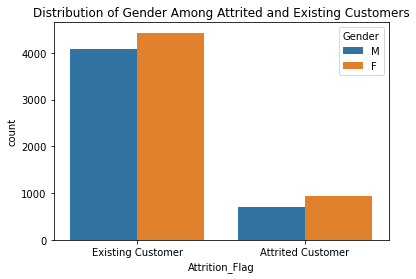

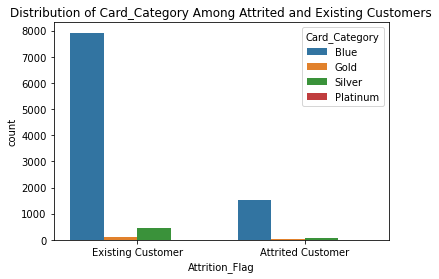

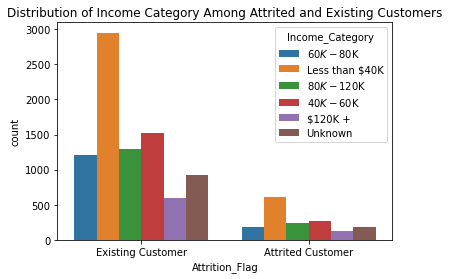

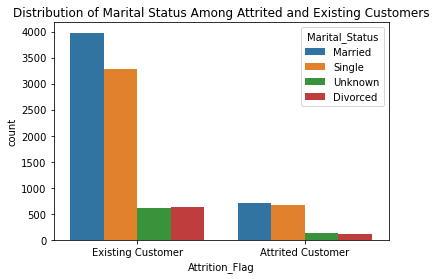

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2543
           1       0.72      0.47      0.56       496

    accuracy                           0.88      3039
   macro avg       0.81      0.71      0.75      3039
weighted avg       0.87      0.88      0.87      3039

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2543
           1       0.80      0.78      0.79       496

    accuracy                           0.93      3039
   macro avg       0.88      0.87      0.87      3039
weighted avg       0.93      0.93      0.93      3039

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2543
           1       0.93      0.76      0.83       496

    accuracy                           0.95      3039
   macro avg       0.94      0.87      0.90      3039
weighted avg       0.95      0.95      0.95      3039



/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:38:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.91      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039



<AxesSubplot:>

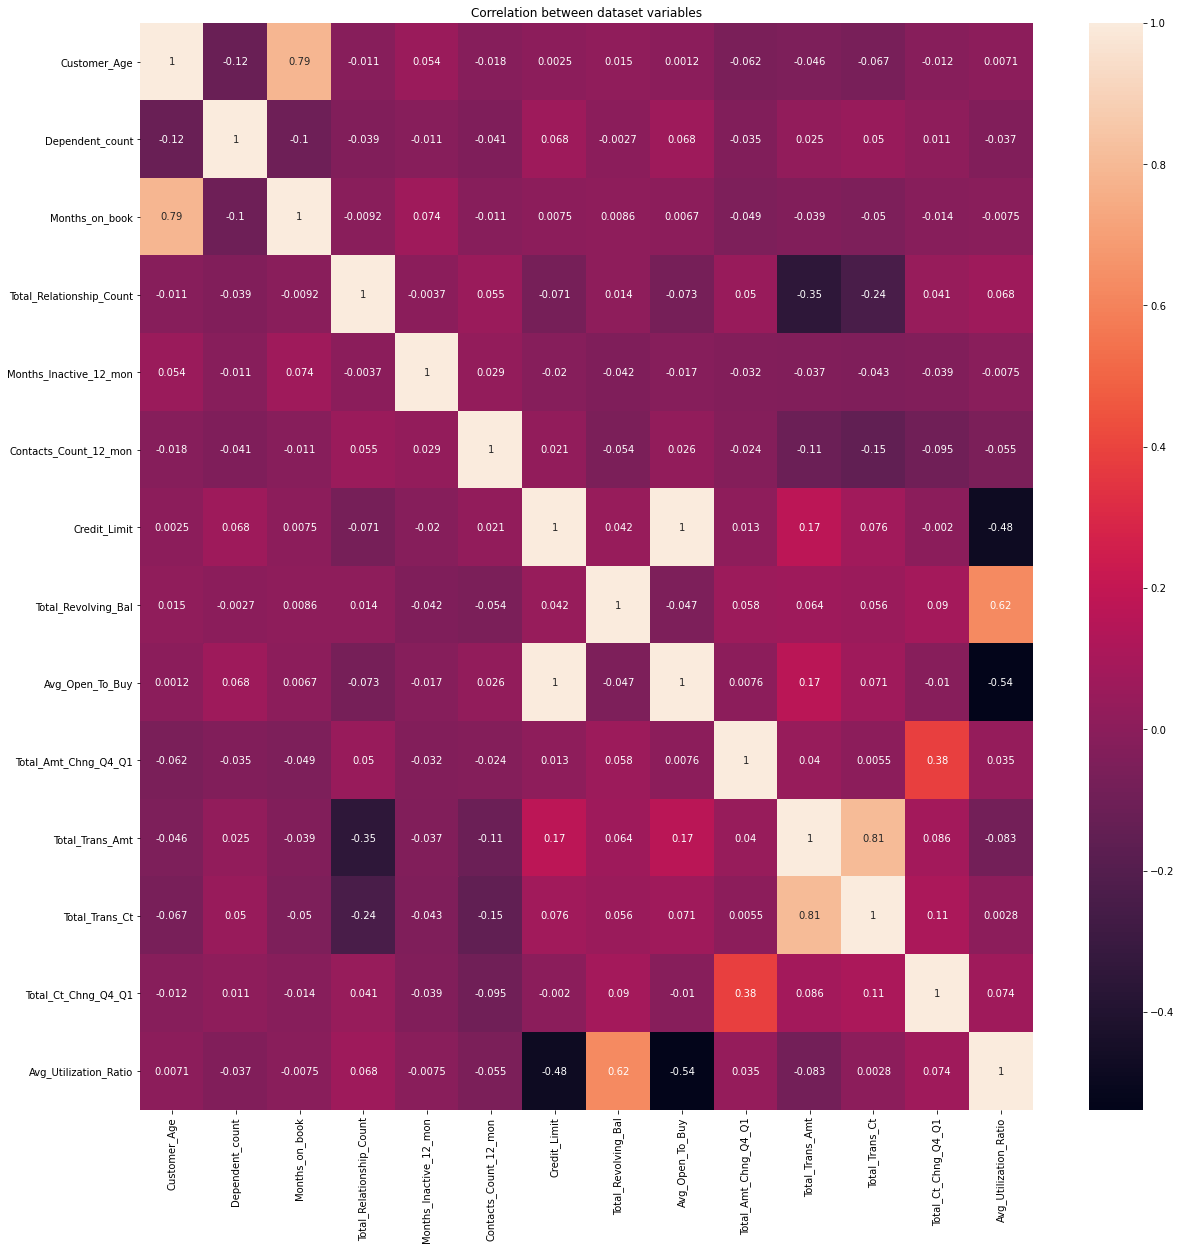

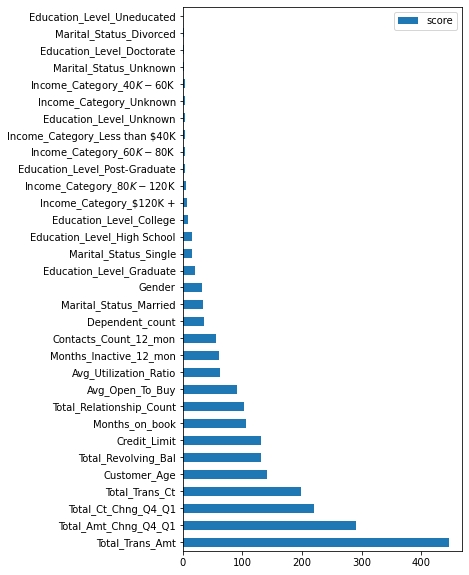

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[95]:


import pandas as pd
import numpy as np


# In[96]:


df=pd.read_csv ("../input/credit-card-customers/BankChurners.csv")


# In[97]:


df.head(10)


# In[98]:


df=df.iloc[:,:-2]
df.head()


# In[99]:


df.info()


# In[100]:


df=df.drop(["CLIENTNUM"],axis=1)


# In[101]:


df.head(10)


# In[102]:


df.dropna()


# In[103]:


df.isnull().sum()


# In[104]:


df.describe()


# In[105]:


df.nunique()


# In[106]:


df['Attrition_Flag'].unique()


# In[107]:


df['Income_Category'].unique()


# In[108]:


df['Card_Category'].unique()


# In[109]:


df['Marital_Status'].unique()


# In[110]:


import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Attrition_Flag', data=df, hue='Gender')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()


# In[111]:


sns.countplot(x='Attrition_Flag', data=df, hue='Card_Category')
plt.title("Distribution of Card_Category Among Attrited and Existing Customers")
plt.show()


# In[112]:


sns.countplot(x='Attrition_Flag', data=df, hue='Income_Category')
plt.title("Distribution of Income Category Among Attrited and Existing Customers")
plt.show()


# In[113]:


sns.countplot(x='Attrition_Flag', data=df, hue='Marital_Status')
plt.title("Distribution of Marital Status Among Attrited and Existing Customers")
plt.show()


# In[114]:


fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, ax=ax)
plt.title("Correlation between dataset variables")


# In[115]:


# Converting Categories into Binary Variables


# In[116]:


df.loc[df["Attrition_Flag"] == "Existing Customer", "Attrition_Flag"] = 0
df.loc[df["Attrition_Flag"] == "Attrited Customer", "Attrition_Flag"] = 1
df["Attrition_Flag"] = df["Attrition_Flag"].astype(int)

df.loc[df["Gender"] == "F", "Gender"] = 0
df.loc[df["Gender"] == "M", "Gender"] = 1
df["Gender"] = df["Gender"].astype(int)


# In[117]:


df.head()


# In[118]:


# One Hot Encoding for Categorical Data


# In[119]:


df = pd.get_dummies(df)
df.head(10)


# In[120]:


# Data Preprocessiing:


# In[121]:


from sklearn.model_selection import train_test_split
X=df.drop("Attrition_Flag",axis=1)
y=df.Attrition_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# In[122]:


X_train.shape


# In[123]:


y_test.shape


# In[124]:


# Logistic Regression:


# In[126]:


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


# In[127]:


from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))


# In[ ]:


# Decsion Tree Classifier


# In[128]:


from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(random_state=0)
dtmodel.fit(X_train,y_train)
dtpredictions=dtmodel.predict(X_test)
print(classification_report(y_test,dtpredictions))


# In[ ]:


# Random Forest:


# In[129]:


from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0,max_depth=100,n_estimators=50)
rfmodel.fit(X_train,y_train)
rfpredictions=rfmodel.predict(X_test)
print(classification_report(y_test,rfpredictions))


# In[ ]:


# Extreme Gradient Boosting Classifier(XGBoost):


# In[130]:


import xgboost as xgb
xgbmodel = xgb.XGBClassifier(random_state=0)
xgbmodel.fit(X_train,y_train)
xgbpredictions=xgbmodel.predict(X_test)
print(classification_report(y_test,xgbpredictions))


# In[131]:


feature_important = xgbmodel.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh',figsize=(5,10))


# In[ ]:


# Hence, From the above graph it is clear that Total_Trans_Amt is an important featue that decides between Existing and Churning
# customer.